In [162]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests

In [163]:
person = [0.7785934, 0.7902058, 0.8144967, 0.7993604, 0.6957953, 0.78516525, 0.81369853, 0.74844253]
person_rand = [0.4997632, 0.53151315, 0.4953193, 0.48565182, 0.51492274, 0.50330985, 0.47631958, 0.5]
face = [0.83686125, 0.8601667, 0.84533286, 0.8287057, 0.75272024, 0.88401073, 0.8057525, 0.8155809]
face_rand = [0.50652635, 0.49794447, 0.6964292, 0.5, 0.57799053, 0.4734094, 0.5340897, 0.5132827]
animal = [0.728, 0.778, 0.832, 0.724, 0.685, 0.763, 0.760, 0.822]
animal_rand = [0.490, 0.518, 0.467, 0.506, 0.492, 0.492, 0.490, 0.460]
vehicle = [0.63666004, 0.7749062, 0.70542634, 0.6765815, 0.5861905, 0.66044986, 0.637699, 0.72237015]
vehicle_rand = [0.51243365, 0.46709448, 0.5088834, 0.5, 0.4573095, 0.5398707, 0.5137987, 0.5396303]
outdoor = [0.6075605, 0.595832, 0.58580244, 0.61947834, 0.48774514, 0.68280077, 0.64264286, 0.64079547]
outdoor_rand = [0.4352548, 0.47683832, 0.54090405, 0.4749565, 0.50131303, 0.49639726, 0.45271426, 0.3698519]
sports = [0.67907643, 0.8179509, 0.8033872, 0.7283197, 0.6249999, 0.7426069, 0.67639476, 0.7721769]
sports_rand = [0.4761905, 0.5304762, 0.50676864, 0.5143444, 0.50541246, 0.5006824, 0.4957806, 0.49680126]
food = [0.83188015, 0.7146096, 0.78497267, 0.7598106, 0.7156991, 0.71799564, 0.777656, 0.76861054]
food_rand = [0.4390853, 0.54637724, 0.5690207, 0.49045455, 0.5523299, 0.5573561, 0.48547196, 0.44132835]
furniture = [0.74236554, 0.63419354, 0.67153484, 0.56088924, 0.6056729, 0.6840717, 0.6891775, 0.6668134]
furniture_rand = [0.5313172, 0.49489248, 0.47832003, 0.49440512, 0.42427492, 0.56255865, 0.52089465, 0.49288598]

In [164]:
def process(categories, categories_rand, names):
    CTEs = [np.mean(c) for c in categories]
    CTEs_rand = [np.mean(c) for c in categories_rand]
    error = [np.std(c) for c in categories]
    error_rand = [np.std(c) for c in categories_rand]
    x_pos = np.arange(len(categories))*5
    return CTEs, CTEs_rand, error, error_rand, x_pos

In [165]:
# Build the plot
def build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names):
    plt.rc('font', size=15)
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 8)
    plt.yticks(np.arange(0, 1, 0.1))
    ax.bar(x_pos, CTEs, yerr=error, align='center', color='blue', alpha=0.5, ecolor='black', capsize=14, width=2)
    ax.bar(x_pos+2, CTEs_rand, yerr=error_rand, align='center', color='red', alpha=0.5, ecolor='black', capsize=14, width=2)
    ax.set_ylabel('AUC')
    ax.set_xticks(x_pos+1)
    ax.set_xticklabels(names)
    ax.set_title('AUC of Different Categories')
    ax.yaxis.grid(True)
    ax.legend(['Model', 'Random'])
    # Save the figure and show
    # plt.tight_layout()
    # plt.savefig('bar_plot_with_error_bars.png')
    plt.show()
    return

In [166]:
def ttest(names, categories, categories_rand):
    pvals = []
    for r, u, v in zip(names, categories, categories_rand):
        print(r,':')
        t_stat = stats.ttest_ind(u, v).statistic
        pval = stats.ttest_ind(u, v).pvalue / 2
        print('t-statistic:', t_stat, 'p-value:', pval)
        pvals.append(pval)
    # Create a list of the adjusted p-values
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='bonferroni') 
    print("Bonferroni:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='fdr_bh') # Benjamini/Hochberg
    print("Benjamini/Hochberg:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)

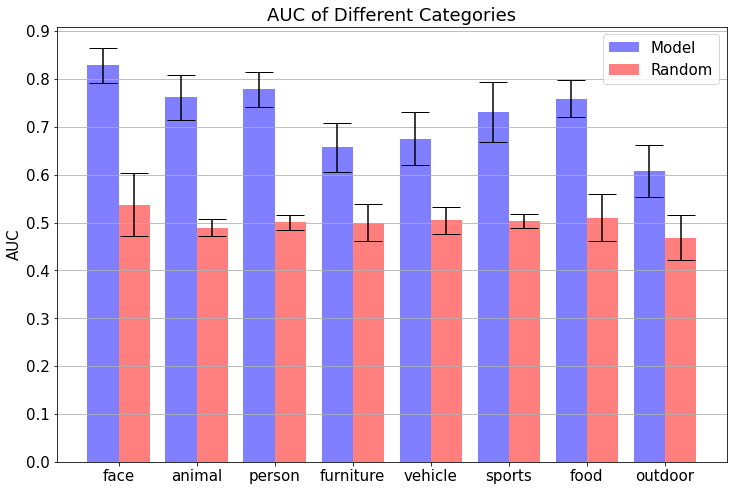

In [167]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor']
categories = [face, animal, person, furniture, vehicle, sports, food, outdoor]
categories_rand = [face_rand, animal_rand, person_rand, furniture_rand, vehicle_rand, sports_rand, food_rand, outdoor_rand]
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names)

In [168]:
ttest(names, categories, categories_rand)

face :
t-statistic: 10.11598979645343 p-value: 4.048212655325941e-08
animal :
t-statistic: 14.485996688747932 p-value: 4.0327720375866824e-10
person :
t-statistic: 18.272385980721282 p-value: 1.8229482953080907e-11
furniture :
t-statistic: 6.424601156575583 p-value: 7.940906584404202e-06
vehicle :
t-statistic: 7.301613495177112 p-value: 1.9499300348921045e-06
sports :
t-statistic: 9.325960202953269 p-value: 1.1007113032725453e-07
food :
t-statistic: 10.48336492617673 p-value: 2.5948253991602724e-08
outdoor :
t-statistic: 5.123433637760139 p-value: 7.743513102378257e-05
Bonferroni:

Reject: [ True  True  True  True  True  True  True  True]
pvals corrected: [3.23857012e-07 3.22621763e-09 1.45835864e-10 6.35272527e-05
 1.55994403e-05 8.80569043e-07 2.07586032e-07 6.19481048e-04]
Benjamini/Hochberg:

Reject: [ True  True  True  True  True  True  True  True]
pvals corrected: [8.09642531e-08 1.61310882e-09 1.45835864e-10 9.07532181e-06
 2.59990671e-06 1.76113809e-07 6.91953440e-08 7.74351310

In [169]:
vehicle_fine =[[0.66075385, 0.7282472, 0.58259773, 0.5359848],
               [0.6631206, 0.5915948, 0.5892673, 0.6021825],
               [0.622807, 0.5080645, 0.6217673, 0.56052965],
               [0.6677753, 0.57481945, 0.6903955, 0.49680173],
               [0.58729005, 0.5304438, 0.5953664, 0.62393165], 
               [0.7135531, 0.75, 0.68079096, 0.41919193],
               [0.68711424, 0.56153846, 0.6707602, 0.5964912],
               [0.7467105, 0.8697917, 0.7822581, 0.71794873]]

vehicle_fine_rand = [[0.36733186, 0.5094577, 0.55674654, 0.5123106],
                     [0.59101653, 0.52693963, 0.43188855, 0.452877],
                     [0.6118421, 0.43884408, 0.5630388, 0.5006305],
                     [0.5735403, 0.46955624, 0.64689267, 0.39445633], 
                     [0.5474799, 0.40505677, 0.62015086, 0.48376065],
                     [0.49120876, 0.62916666, 0.5892656, 0.4018759],
                     [0.40586424, 0.4945055, 0.60994154, 0.50350875],
                     [0.6200658, 0.48437503, 0.45967743, 0.5705128]]

animal_fine = [[0.6562126, 0.6293103, 0.7168193, 0.5204545, 0.6401699],
               [0.7263737, 0.6260559, 0.7900486, 0.46318185, 0.58901095], 
               [0.56587297, 0.5159401, 0.7735849, 0.45761383, 0.5825658],
               [0.6809965, 0.6252459, 0.67919385, 0.6650793, 0.568948], 
               [0.75943935, 0.60535717, 0.6785714, 0.48125002, 0.76325476],
               [0.5858124, 0.5165692, 0.6377996, 0.50789475, 0.68078053],
               [0.6246169, 0.64687705, 0.5415094, 0.5851485, 0.555921], 
               [0.50825596, 0.5681244, 0.6764706, 0.57936513, 0.50472337]]
animal_fine_rand =[[0.479092, 0.48373455, 0.5818078, 0.50772727, 0.30885923],
                   [0.58214283, 0.5076349, 0.57888347, 0.35000002, 0.47857144],
                   [0.60105824, 0.42355236, 0.5377359, 0.47605962, 0.49276313],
                   [0.6097883, 0.5062294, 0.49891067, 0.64285713, 0.5089377],
                   [0.49742565, 0.53912336, 0.40453297, 0.31776315, 0.6332842],
                   [0.48741415, 0.47092268, 0.66884536, 0.6210526, 0.6384388], 
                   [0.45199183, 0.5712427, 0.43301886, 0.45940593, 0.55986845],
                   [0.6413829, 0.54835993, 0.5735294, 0.49886623, 0.5647773]]

tool_fine = [[ 0.5743535, 0.75692976, 0.64179105, 0.60554373, 0.53125],
 [ 0.61093754, 0.54642856, 0.675, 0.5637255, 0.5416667],
 [ 0.5750315, 0.7316177, 0.7916666, 0.9086956, 0.5739248],
 [ 0.6291666, 0.54347825, 0.43872553, 0.8566176, 0.75367653],
 [ 0.55328214, 0.46607143, 0.531983, 0.7992425, 0.7547348],
 [ 0.6334776, 0.7761195, 0.8195312, 0.7398438, 0.64188033],
 [ 0.5668348, 0.7492753, 0.90196073, 0.82720584, 0.6861473],
 [ 0.6521276, 0.8254717, 0.88142854, 0.78431374, 0.7164032]]
tool_fine_rand = [[0.51670253, 0.5660981, 0.47761196, 0.55650324, 0.5015625],
 [0.53046876, 0.44047618, 0.44226193, 0.5441176, 0.3247549],
 [0.52900386, 0.36642158, 0.43655303, 0.71304345, 0.6028226],
 [0.55375004, 0.59855074, 0.4117647, 0.6691177, 0.5330882],
 [0.42753622, 0.24464287, 0.38379532, 0.5729166, 0.51799244],
 [0.44588745, 0.30597013, 0.41953126, 0.5367187, 0.5213675],
 [0.34867594, 0.4246377, 0.5710784, 0.5245098, 0.6269841],
 [0.32127658, 0.41981134, 0.50714284, 0.5294118, 0.46837947]]

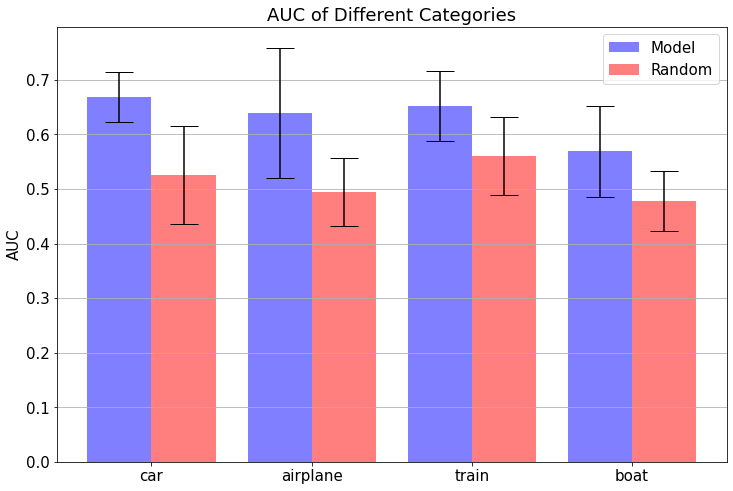

In [170]:
#names = ['bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat']
names = ['car', 'airplane', 'train', 'boat']
categories, categories_rand = vehicle_fine, vehicle_fine_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names)

In [171]:
ttest(names, categories, categories_rand)

car :
t-statistic: 3.7436296437548773 p-value: 0.0010903430635485951
airplane :
t-statistic: 2.8306979571494937 p-value: 0.0066741860777969324
train :
t-statistic: 2.537892308047697 p-value: 0.011833196541904954
boat :
t-statistic: 2.4213908858385538 p-value: 0.01481430544427741
Bonferroni:

Reject: [ True  True  True False]
pvals corrected: [0.00436137 0.02669674 0.04733279 0.05925722]
Benjamini/Hochberg:

Reject: [ True  True  True  True]
pvals corrected: [0.00436137 0.01334837 0.01481431 0.01481431]


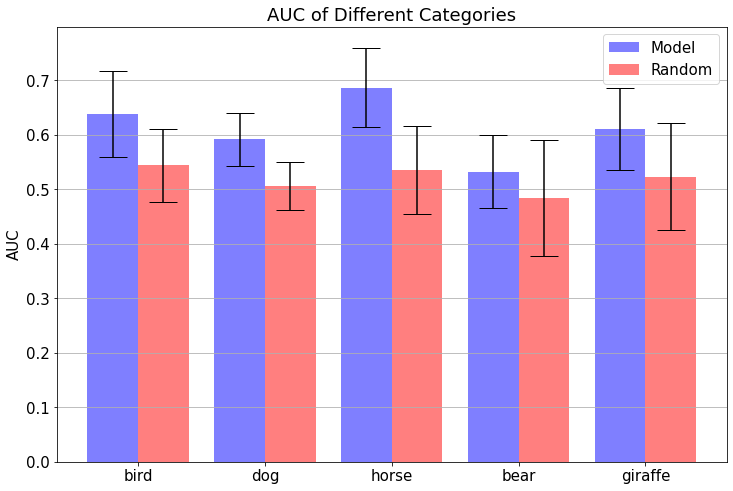

In [172]:
#names = ['bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe']
names = ['bird', 'dog', 'horse', 'bear', 'giraffe']
categories, categories_rand = animal_fine, animal_fine_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names)

In [173]:
ttest(names, categories, categories_rand)

bird :
t-statistic: 2.412089618054694 p-value: 0.015080992548017693
dog :
t-statistic: 3.4348183101437972 p-value: 0.002012160976528268
horse :
t-statistic: 3.691046801333835 p-value: 0.001209921145000128
bear :
t-statistic: 1.0122786494223284 p-value: 0.16429051253566368
giraffe :
t-statistic: 1.8604581469200099 p-value: 0.0419776267831234
Bonferroni:

Reject: [False  True  True False False]
pvals corrected: [0.07540496 0.0100608  0.00604961 0.82145256 0.20988813]
Benjamini/Hochberg:

Reject: [ True  True  True False False]
pvals corrected: [0.02513499 0.0050304  0.0050304  0.16429051 0.05247203]


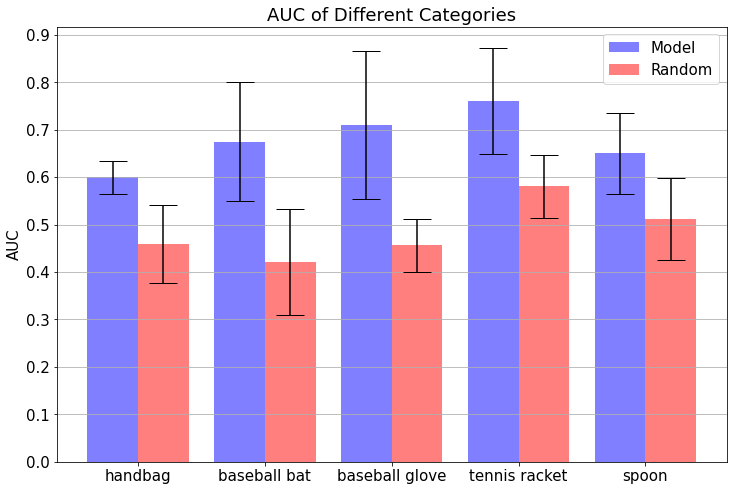

In [174]:
names = ['handbag', 'baseball bat', 'baseball glove', 'tennis racket', 'spoon']

categories, categories_rand = tool_fine, tool_fine_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names)

In [175]:
ttest(names, categories, categories_rand)


handbag :
t-statistic: 4.148789114898755 p-value: 0.0004919428364672004
baseball bat :
t-statistic: 3.991399474592408 p-value: 0.0006692184060077706
baseball glove :
t-statistic: 4.039816651882497 p-value: 0.0006086386450635787
tennis racket :
t-statistic: 3.6507755004941522 p-value: 0.0013104133320382704
spoon :
t-statistic: 2.999847124128844 p-value: 0.004777203704074906
Bonferroni:

Reject: [ True  True  True  True  True]
pvals corrected: [0.00245971 0.00334609 0.00304319 0.00655207 0.02388602]
Benjamini/Hochberg:

Reject: [ True  True  True  True  True]
pvals corrected: [0.00111536 0.00111536 0.00111536 0.00163802 0.0047772 ]
